In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model


warnings.filterwarnings('ignore')

%matplotlib inline
unclean_df = pd.read_csv('anime.csv')


I want to explore how the average anime performs. Specifcally votes cna affect other feature or how other features can affect votes

First want a visual and information on the unclean dataframe...

In [3]:
unclean_df = unclean_df.sort_values(by=['votes'],ascending=False)


In [4]:
unclean_df = unclean_df.set_index('title')
unclean_df

mediaType    eps  startYr  \
title                                                                         
Death Note                                               TV   37.0   2006.0   
Naruto                                                   TV  220.0   2002.0   
Attack on Titan                                          TV   25.0   2013.0   
Sword Art Online                                         TV   25.0   2012.0   
Fullmetal Alchemist                                      TV   51.0   2003.0   
...                                                     ...    ...      ...   
Welcome to Demon School, Iruma-kun 2                     TV    NaN   2021.0   
Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai  Music Video    1.0   2020.0   
Minagoroshi                                             OVA    1.0   2005.0   
Kurayukaba                                            Movie    NaN      NaN   
YOASOBI: Harujion                               Music Video    1.0   2020.0   

                                                finishYr             studios  \
title                                                                          
Death Note                                        2007.0        ['MADHOUSE']   
Naruto                                            2007.0  ['Studio Pierrot']   
Attack on Titan                                   2013.0      ['Wit Studio']   
Sword Art Online                                  2012.0    ['A-1 Pictures']   
Fullmetal Alchemist                               2004.0           ['Bones']   
...                                                  ...                 ...   
Welcome to Demon School, Iruma-kun 2              2021.0                  []   
Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai    2020.0                  []   
Minagoroshi                                       2005.0                  []   
Kurayukaba                                           NaN         ['Makaria']   
YOASOBI: Harujion                                 2020.0                  []   

                                                 watched  watching  wantWatch  \
title                                                                           
Death Note                                      161567.0     11048      17819   
Naruto                                          119474.0     16302      10231   
Attack on Titan                                 121565.0     11986      14431   
Sword Art Online                                117831.0      7144       9986   
Fullmetal Alchemist                             111770.0      6633      15472   
...                                                  ...       ...        ...   
Welcome to Demon School, Iruma-kun 2                 0.0         0       1106   
Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai       9.0         1          7   
Minagoroshi                                          3.0         0          7   
Kurayukaba                                           0.0         0         62   
YOASOBI: Harujion                                   13.0         0          6   

                                                dropped  rating     votes  
title                                                                      
Death Note                                         7830   4.501  131067.0  
Naruto                                            12124   4.080   97965.0  
Attack on Titan                                    3739   4.488   97268.0  
Sword Art Online                                   4623   4.184   92416.0  
Fullmetal Alchemist                                4445   4.437   86608.0  
...                                                 ...     ...       ...  
Welcome to Demon School, Iruma-kun 2                  0     NaN       NaN  
Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai        1     NaN       NaN  
Minagoroshi                                           0     NaN       NaN  
Kurayukaba                                            0     NaN       NaN  
YOASOBI: Haruji

In [5]:
unclean_df.info()
unclean_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 14578 entries, Death Note to YOASOBI: Harujion
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mediaType  14510 non-null  object 
 1   eps        14219 non-null  float64
 2   startYr    14356 non-null  float64
 3   finishYr   14134 non-null  float64
 4   studios    14578 non-null  object 
 5   watched    14356 non-null  float64
 6   watching   14578 non-null  int64  
 7   wantWatch  14578 non-null  int64  
 8   dropped    14578 non-null  int64  
 9   rating     12107 non-null  float64
 10  votes      12119 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.3+ MB


(14578, 11)

 #### Q1. Remove missing/null data and drop data that is unessecary.
- from above I can identify which categories have null values
- in addition I am only going to ivestigate Tv shows and movies, show I got rid of any other media Types

In [6]:
df = unclean_df.dropna(subset = ["mediaType", "eps", "startYr", "finishYr", "watched", "rating", "votes" ])

df= df.drop(df.index[df.studios == "[]"] )
df= df.drop(df.index[df.mediaType == "TV Special"] )
df= df.drop(df.index[df.mediaType == "DVD Special"] )
df= df.drop(df.index[df.mediaType == "Other"] )
df= df.drop(df.index[df.mediaType == "Music Video"] )
df= df.drop(df.index[df.mediaType == "Web"] )
df= df.drop(df.index[df.mediaType == "OVA"] )

df = df.drop(df.index[df.studios == "[]"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, Death Note to Ultra B: Black Hole kara no Dokusaisha BB!!
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mediaType  5028 non-null   object 
 1   eps        5028 non-null   float64
 2   startYr    5028 non-null   float64
 3   finishYr   5028 non-null   float64
 4   studios    5028 non-null   object 
 5   watched    5028 non-null   float64
 6   watching   5028 non-null   int64  
 7   wantWatch  5028 non-null   int64  
 8   dropped    5028 non-null   int64  
 9   rating     5028 non-null   float64
 10  votes      5028 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 471.4+ KB


 #### Q2. Removing outliers
- The are many outlier in this dataframe so I must remove them to ensure the data reflects how the average anime performs

In [7]:
#IQR
# Calculate the upper and lower limits
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR


#drop if higher than upper limits or lower than lower limits
df= df.drop(df.index[df.votes > upper] )
df= df.drop(df.index[df.votes < lower] )

In [8]:
#IQR
# Calculate the upper and lower limits
Q1 = df['watched'].quantile(0.25)
Q3 = df['watched'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
#drop if higher than upper limits or lower than lower limits

df= df.drop(df.index[df.watched > upper] )
df= df.drop(df.index[df.watched < lower] )

In [9]:
#IQR
# Calculate the upper and lower limits
Q1 = df['wantWatch'].quantile(0.25)
Q3 = df['wantWatch'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
#drop if higher than upper limits or lower than lower limits
df= df.drop(df.index[df.wantWatch > upper] )
df= df.drop(df.index[df.wantWatch < lower] )

 #### Q3. encoding data


In [10]:
# Convert object features into digit features by using an encoder

ord_enc = OrdinalEncoder()


df["typeCode"] = ord_enc.fit_transform(df[["mediaType"]])
df[["mediaType", "typeCode"]]

df["studiosCode"] = ord_enc.fit_transform(df[["studios"]])
df[["studios", "studiosCode"]]





studios  \
title                                                                         
Zatch Bell!                                              ['Toei Animation']   
Berserk (2016)                                     ['Millepensee', 'GEMBA']   
Occult Academy                                             ['A-1 Pictures']   
Yowamushi Pedal                              ['TMS Entertainment', '8 Pan']   
One Outs                                                       ['MADHOUSE']   
...                                                                     ...   
Mama wa Poyopoyo-saurus ga Osuki                       ['Nippon Animation']   
Animation Kikou Marco Polo no Bouken                           ['MADHOUSE']   
Uchuu Patrol Hopper                                      ['Toei Animation']   
Bikkuriman 2000                                            ['Studio Comet']   
Ultra B: Black Hole kara no Dokusaisha BB!!           ['Shin-Ei Animation']   

                                             studiosCode  
title                                                     
Zatch Bell!                                        487.0  
Berserk (2016)                                     255.0  
Occult Academy                                       6.0  
Yowamushi Pedal                                    454.0  
One Outs                                           238.0  
...                                                  ...  
Mama wa Poyopoyo-saurus ga Osuki                   272.0  
Animation Kikou Marco Polo no Bouken               238.0  
Uchuu Patrol Hopper                                487.0  
Bikkuriman 2000                                    399.0  
Ultra B: Black Hole kara no Dokusaisha BB!!        372.0  

[3925 rows x 2 columns]

 #### Q4. Exploring the clean Data
    - descriptive statistics
    - descriptive stats by media type and stuidos

In [11]:
df.shape

(3925, 13)

In [12]:

df.describe()



eps      startYr     finishYr      watched     watching  \
count  3925.000000  3925.000000  3925.000000  3925.000000  3925.000000   
mean     22.985478  2004.087898  2004.427516  1403.385732   163.493503   
std      59.069026    13.819285    13.661357  1780.179632   285.749351   
min       1.000000  1956.000000  1956.000000     0.000000     0.000000   
25%       1.000000  1996.000000  1997.000000   125.000000     8.000000   
50%      12.000000  2008.000000  2008.000000   594.000000    37.000000   
75%      26.000000  2015.000000  2016.000000  2068.000000   192.000000   
max    1818.000000  2020.000000  2020.000000  7865.000000  3274.000000   

         wantWatch      dropped       rating        votes     typeCode  \
count  3925.000000  3925.000000  3925.000000  3925.000000  3925.000000   
mean    951.606115   145.855287     3.110317  1045.375287     0.700892   
std     990.572377   239.812175     0.684397  1340.042749     0.457926   
min       0.000000     0.000000     1.081000    10.000000     0.000000   
25%     150.000000     9.000000     2.634000    80.000000     0.000000   
50%     553.000000    31.000000     3.142000   430.000000     1.000000   
75%    1498.000000   192.000000     3.634000  1594.000000     1.000000   
max    3955.000000  2807.000000     4.599000  7123.000000     1.000000   

       studiosCode  
count  3925.000000  
mean    321.613503  
std     155.183896  
min       0.000000  
25%     197.000000  
50%     364.000000  
75%     461.000000  
max     546.000000

In [13]:
typeM = df.groupby('mediaType')
typeM.rating.describe()

count      mean       std    min      25%    50%      75%    max
mediaType                                                                   
Movie      1174.0  3.309532  0.656445  1.453  2.86275  3.369  3.83575  4.518
TV         2751.0  3.025301  0.678515  1.081  2.56800  3.065  3.53950  4.599

In [14]:
studio = df.groupby('studios')
studio.rating.describe()

count      mean       std    min  \
studios                                                                 
['10GAUGE', 'Tatsunoko Production']    1.0  2.655000       NaN  2.655   
['10GAUGE']                            4.0  2.919250  0.518177  2.407   
['3xCube', 'TMS Entertainment']        1.0  3.635000       NaN  3.635   
['8 Pan', 'TMS Entertainment']         1.0  1.704000       NaN  1.704   
['8-Bit', 'Satelight']                 2.0  3.865500  0.341533  3.624   
...                                    ...       ...       ...    ...   
['helo']                               1.0  3.124000       NaN  3.124   
['monofilmo']                          1.0  3.734000       NaN  3.734   
['production doA']                     2.0  3.416000  0.821658  2.835   
['teamKG', 'Hoods Entertainment']      1.0  2.617000       NaN  2.617   
['ufotable']                          12.0  3.452333  0.524529  2.469   

                                         25%     50%      75%    max  
studios                                                               
['10GAUGE', 'Tatsunoko Production']  2.65500  2.6550  2.65500  2.655  
['10GAUGE']                          2.53450  2.8745  3.25925  3.521  
['3xCube', 'TMS Entertainment']      3.63500  3.6350  3.63500  3.635  
['8 Pan', 'TMS Entertainment']       1.70400  1.7040  1.70400  1.704  
['8-Bit', 'Satelight']               3.74475  3.8655  3.98625  4.107  
...                                      ...     ...      ...    ...  
['helo']                             3.12400  3.1240  3.12400  3.124  
['monofilmo']                        3.73400  3.7340  3.73400  3.734  
['production doA']                   3.12550  3.4160  3.70650  3.997  
['teamKG', 'Hoods Entertainment']    2.61700  2.6170  2.61700  2.617  
['ufotable']                         3.17725  3.3115  4.01850  4.159  

[547 rows x 8 columns]

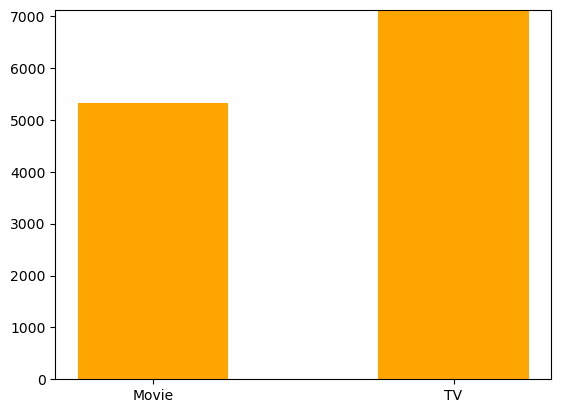

In [1138]:
plt.bar(df['mediaType'], df["votes"], width=0.5, color="orange", label="All cases")
plt.ylim(top = max(df["votes"]))
plt.show()

<Axes: title={'center': 'rating'}, xlabel='mediaType'>

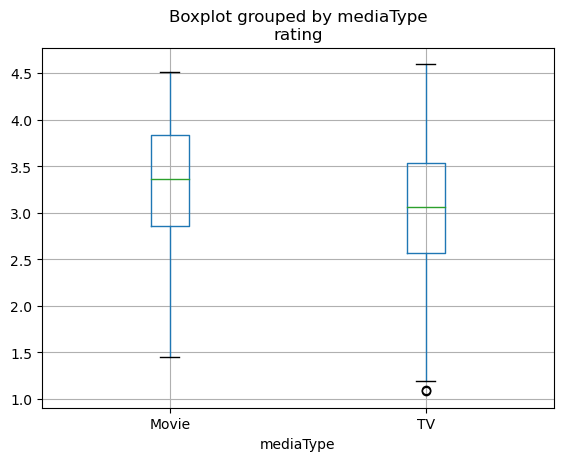

In [1139]:
df.boxplot("rating",by ="mediaType")

In [1142]:
#average rating are aorund the same for movies and Tv shows, there is more popularity/ more tvshows produced

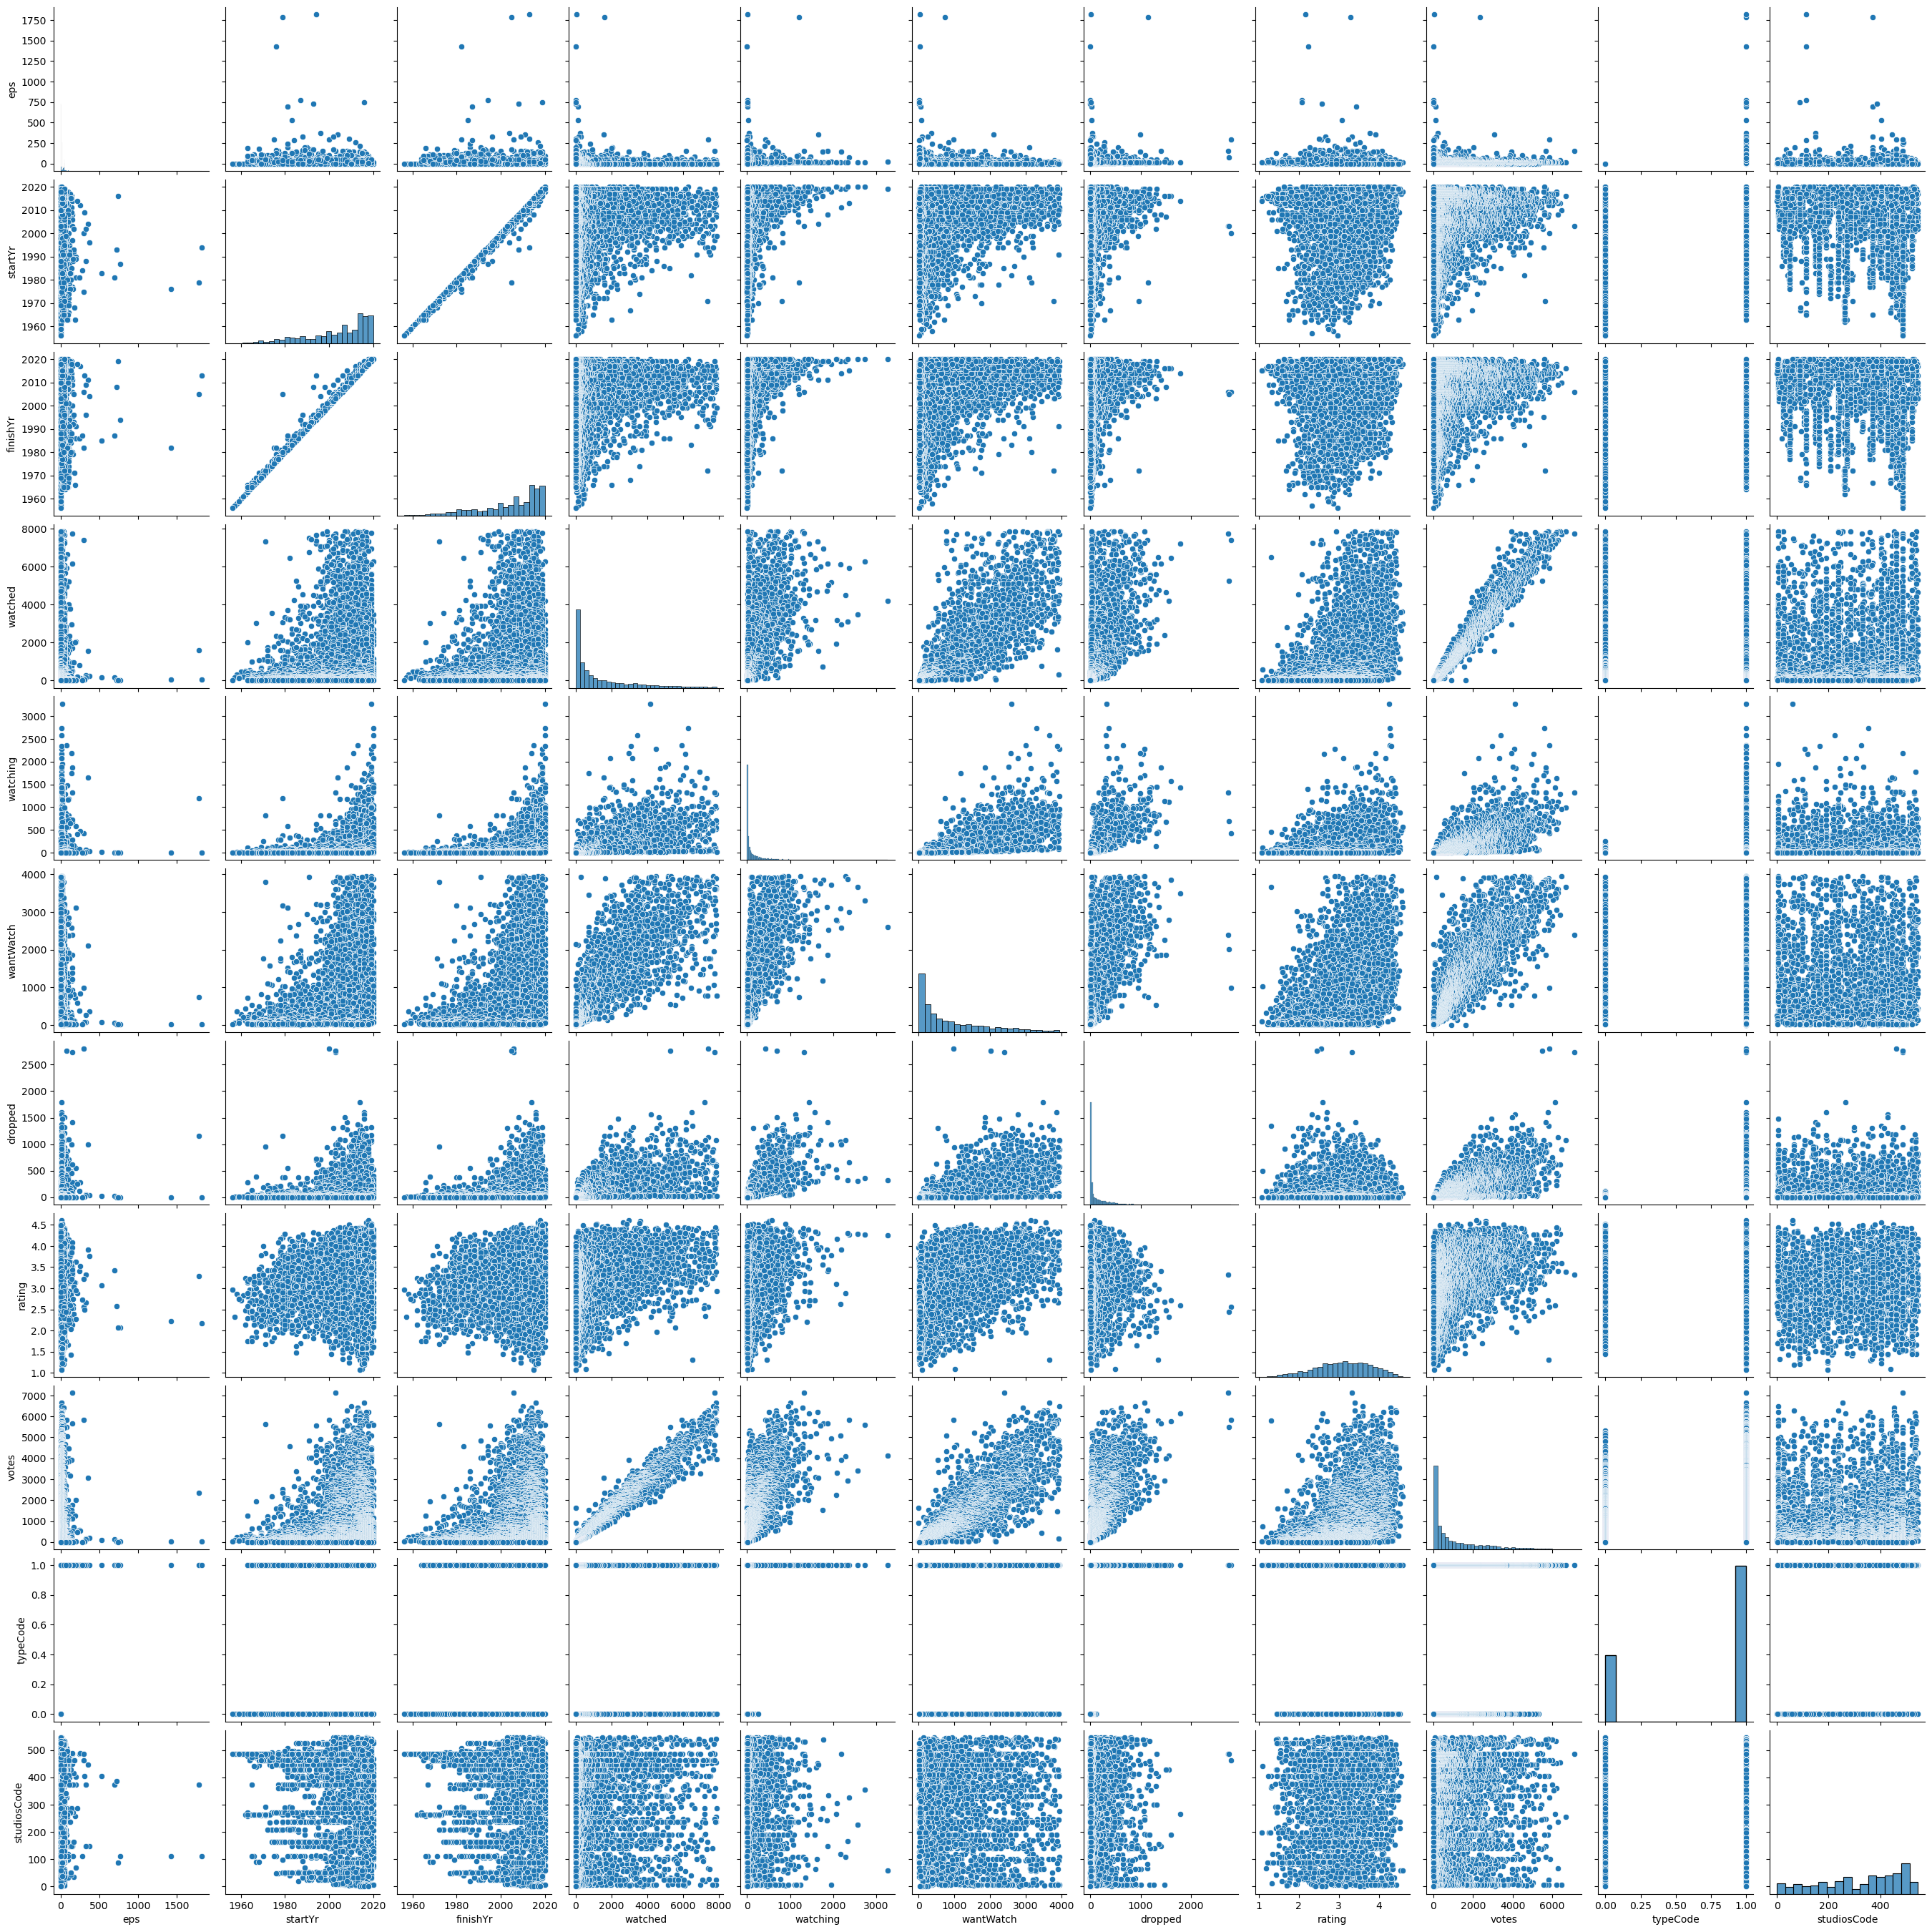

In [15]:
sns.pairplot(df)

 ### Q5. Exploring correlation


In [1133]:
#Study the correlation between these features.
df.corr()


eps   startYr  finishYr   watched  watching  wantWatch  \
eps          1.000000 -0.159086 -0.107812 -0.069145  0.034102  -0.095116   
startYr     -0.159086  1.000000  0.997979  0.226682  0.347170   0.374178   
finishYr    -0.107812  0.997979  1.000000  0.222348  0.351746   0.369117   
watched     -0.069145  0.226682  0.222348  1.000000  0.606721   0.821483   
watching     0.034102  0.347170  0.351746  0.606721  1.000000   0.705404   
wantWatch   -0.095116  0.374178  0.369117  0.821483  0.705404   1.000000   
dropped      0.050926  0.269241  0.273954  0.608379  0.741158   0.647845   
rating      -0.065255  0.129848  0.127780  0.413072  0.249014   0.457213   
votes       -0.049261  0.270101  0.267440  0.980187  0.715431   0.856840   
typeCode     0.243176  0.088926  0.106196  0.123891  0.326377   0.161481   
studiosCode -0.003901 -0.192885 -0.193079 -0.070989 -0.103776  -0.115322   

              dropped    rating     votes  typeCode  studiosCode  
eps          0.050926 -0.065255 -0.049261  0.243176    -0.003901  
startYr      0.269241  0.129848  0.270101  0.088926    -0.192885  
finishYr     0.273954  0.127780  0.267440  0.106196    -0.193079  
watched      0.608379  0.413072  0.980187  0.123891    -0.070989  
watching     0.741158  0.249014  0.715431  0.326377    -0.103776  
wantWatch    0.647845  0.457213  0.856840  0.161481    -0.115322  
dropped      1.000000  0.022892  0.711894  0.362642    -0.088435  
rating       0.022892  1.000000  0.389695 -0.190177     0.051452  
votes        0.711894  0.389695  1.000000  0.189028    -0.088205  
typeCode     0.362642 -0.190177  0.189028  1.000000    -0.127128  
studiosCode -0.088435  0.051452 -0.088205 -0.127128     1.000000

In [ ]:
#correlation is best with votes... i want to explore further between votes and other features

In [971]:
#correlation between votes and other features
print('Episode correlation:' , df['eps'].corr(df['votes']))
print('startYr correlation:' , df['startYr'].corr(df['votes']))
print('finishYr correlation:' , df['finishYr'].corr(df['votes']))
print('watched correlation:' , df['watched'].corr(df['votes']))
print('watching correlation:' , df['watching'].corr(df['votes']))
print('wantWatch correlation:' , df['wantWatch'].corr(df['votes']))
print('dropped correlation:' , df['dropped'].corr(df['votes']))
print('rating correlation:' , df['rating'].corr(df['votes']))
print('typeCode correlation:' , df['typeCode'].corr(df['votes']))
print('studiosCode correlation:' , df['studiosCode'].corr(df['votes']))

Episode correlation: -0.04926078794811853
startYr correlation: 0.2701011460673465
finishYr correlation: 0.2674403063884073
watched correlation: 0.9801865189628651
watching correlation: 0.7154310661597443
wantWatch correlation: 0.8568398820049297
dropped correlation: 0.7118938028173566
rating correlation: 0.38969515247751185
typeCode correlation: 0.18902826732634612
studiosCode correlation: -0.08820463122721686


In [1148]:
# Prominet correlations: Watched, wantWatch, watching

### Question 6 Logistic Regrssion Trainign and Spliting data

In [1101]:

#train and test data

train, test = train_test_split(df, test_size=0.9, random_state=12)

model = LogisticRegression()
XTrain = train[["eps","startYr","finishYr","watched","watching","wantWatch","dropped","rating","typeCode","studiosCode"]]
YTrain = train ["votes"]
XTest = test [["eps","startYr","finishYr","watched","watching","wantWatch","dropped","rating","typeCode","studiosCode"]]
YTest = test ["votes"]
model.fit(XTrain,YTrain)

LogisticRegression()

In [975]:
# Find important features using the RFE technique
from sklearn.feature_selection import RFE
select =RFE (model, n_features_to_select =3)
select = select.fit(XTrain,YTrain)
select.ranking_

array([6, 2, 1, 1, 3, 1, 4, 7, 8, 5])

In [ ]:
#selected features: finshYR, wacthed, wantWatch

In [1102]:
#evaluate testing accuracy
predicted_test=model.predict(XTest)
print('testing accuracy is: ', accuracy_score( YTest,predicted_test))

testing accuracy is:  0.013020096235493914


In [1103]:
predicted_train=model.predict(XTrain)
print('training accuracy is: ', accuracy_score( YTrain,predicted_train))

training accuracy is:  0.701530612244898


## Linear Regression

In [1167]:

reg = linear_model.LinearRegression()
X = df[['wantWatch']]
y = df['votes']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [1.15912991] + -57.659824043596245


In [1168]:
#We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:
reg.predict(X[:3])

array([ 838.34759691, 4127.95828339, 3066.19528521])

## Q.6  Evaluating the model

In [1176]:
from sklearn.metrics import r2_score

predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
rmse= np.sqrt(mse)

print("MSE:", mse)
print("R Squared:", r2)
print("Rmse:", rmse)

MSE: 477224.9565460983
R Squared: 0.734174583394222
R Squared: 690.8147049289688


### more input varibles

In [1166]:
reg = linear_model.LinearRegression()
X = df[['wantWatch', 'watching']]
y = df['votes']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [1.15912991] + -57.659824043596245


## Q.7 Training and Testing Data
- linear Regressing

In [1172]:
trainLin, testLin = train_test_split(df, test_size=0.2, random_state=142)

modelLin = LinearRegression()
XTrainLin = trainLin[["wantWatch"]]
YTrainLin = trainLin ["votes"]
XTestLin = testLin [["wantWatch"]]
YTestLin = testLin ["votes"]
modelLin.fit(XTrainLin,YTrainLin)

LinearRegression()

In [1174]:

from sklearn.metrics import mean_squared_error

predict = modelLin.predict(XTestLin)
mse = mean_squared_error(YTestLin,predict)
rmse= np.sqrt(mse)
r2 = r2_score(YTestLin, predict)
print('most related features MSE:', mse)
print('most related features Root MSE:', rmse)
print('most related features rsquared:', r2)
print("")

most related features MSE: 460544.71595650644
most related features Root MSE: 678.6344494324661
most related features rsquared: 0.7495953522130152



In [1177]:
# Mse, r2 and rmse has improved


In [1116]:
from sklearn.metrics import mean_absolute_error as mae 
predict = modelLin.predict(XTestLin)


error = mae(YTestLin, predict) 
  

print("Mean absolute error : " + str(error)) 

Mean absolute error : 407.70855567641456


## Q.7 polynomial regression


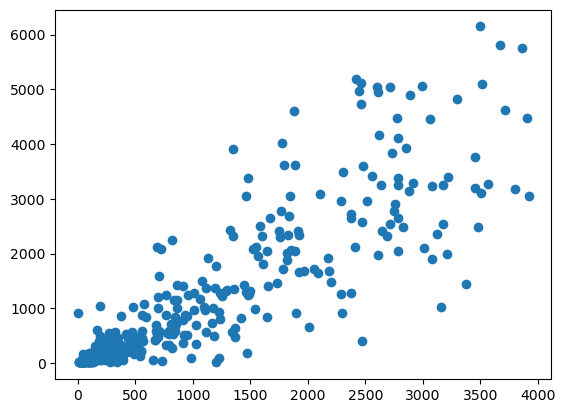

In [1117]:
plt.scatter(XTrainLin, YTrainLin)

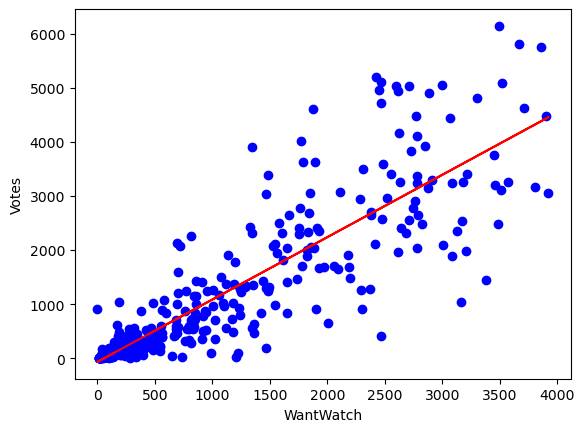

In [1125]:
lin = LinearRegression()
 
lin.fit(XTrainLin, YTrainLin)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(XTrainLin)
 
poly.fit(X_poly, YTrainLin)
lin2 = LinearRegression()
lin2.fit(X_poly, YTrainLin)
plt.scatter(XTrainLin, YTrainLin, color='blue')
 
plt.plot(XTrainLin, lin.predict(XTrainLin), color='red')

plt.xlabel('WantWatch')
plt.ylabel('Votes')
 
plt.show()

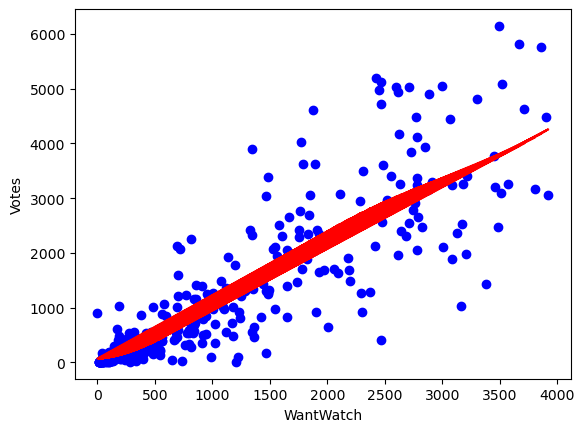

In [1126]:
plt.scatter(XTrainLin, YTrainLin, color='blue')
 
plt.plot(XTrainLin, lin2.predict(poly.fit_transform(XTrainLin)),
         color='red')

plt.xlabel('WantWatch')
plt.ylabel('Votes')
 
plt.show()

In [1127]:
pred = 4000
predarray = np.array([[pred]])
lin.predict(predarray)

array([4547.33973345])

In [1128]:
pred2 = 4000
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([4371.52103176])

In [1079]:
dfCode = df.drop(columns=["mediaType","studios"])

dfCode.head()

eps  startYr  finishYr  watched  \
title                                                                   
Pokemon: Pikachu's Rescue Adventure   1.0   1999.0    1999.0   7865.0   
One Outs                             25.0   2008.0    2009.0   7863.0   
Nagasarete Airantou                  26.0   2007.0    2007.0   7857.0   
Amagami SS+                          13.0   2012.0    2012.0   7856.0   
Birdy the Mighty: Decode             13.0   2008.0    2008.0   7856.0   

                                     watching  wantWatch  dropped  rating  \
title                                                                       
Pokemon: Pikachu's Rescue Adventure        17        773       22   2.934   
One Outs                                  667       3611      420   4.406   
Nagasarete Airantou                       705       2695      595   3.807   
Amagami SS+                               523       2532      277   3.926   
Birdy the Mighty: Decode                  548       3897      465   3.946   

                                      votes  typeCode  studiosCode  
title                                                               
Pokemon: Pikachu's Rescue Adventure  3943.0       0.0        286.0  
One Outs                             6279.0       1.0        238.0  
Nagasarete Airantou                  5771.0       1.0        541.0  
Amagami SS+                          5825.0       1.0         25.0  
Birdy the Mighty: Decode             5819.0       1.0          6.0

# Q. 9 Clustering

In [1080]:

km=KMeans(n_clusters = 4)
km.fit(dfCode)
dfCode['label'] = km.predict(dfCode)


In [1081]:
dfCode_mean = dfCode.groupby(['label']).agg('mean')
dfCode_mean

eps      startYr     finishYr      watched    watching  \
label                                                                 
0      18.315789  2009.161654  2009.387218  6151.842105  633.026316   
1      26.562253  2000.558733  2000.985482   262.767268   30.595249   
2      18.970838  2008.622114  2008.867558  1563.178615  204.081409   
3      16.619893  2009.310835  2009.490231  3531.319716  418.872114   

         wantWatch     dropped    rating        votes  typeCode  studiosCode  
label                                                                         
0      2755.477444  543.248120  3.590759  4600.823308  0.857143   306.270677  
1       286.399472   33.284646  2.867507   185.282886  0.644083   331.827981  
2      1337.921021  189.274605  3.332424  1172.388821  0.742406   316.455650  
3      2220.252220  349.110124  3.538940  2652.317940  0.795737   295.163410

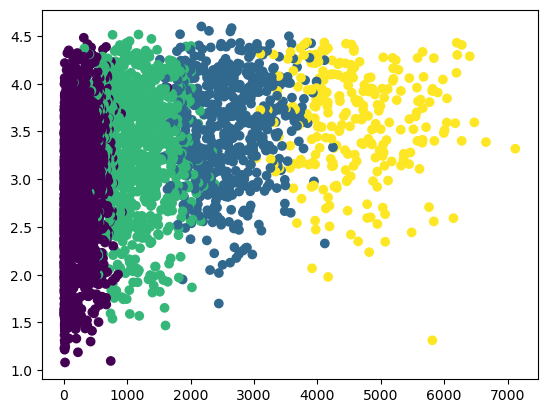

In [982]:
plt.scatter(dfCode['votes'], dfCode['rating'], c=dfCode['label'])
#shows how 4 levels of popularity/ higher votes.
#generally the higher the rating the hgiher the votes --> showing that better quality anime are rated hgiher
# however you can see that the relationship is not a strong as others

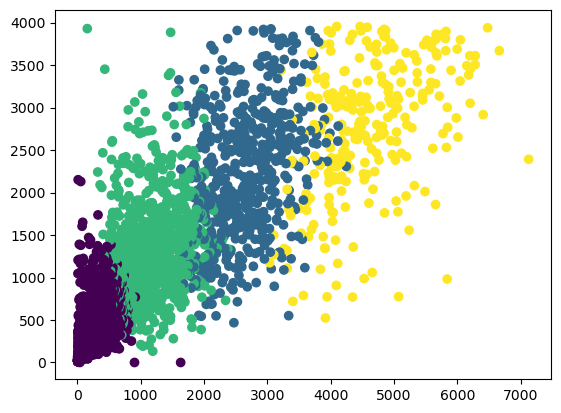

In [983]:
plt.scatter(dfCode['votes'], dfCode['wantWatch'], c=dfCode['label'])
#shows how 4 levels of popularity/ higher votes.
#generally the higher the votes the more people will want to watch --> showing how votes influence people towatch anime

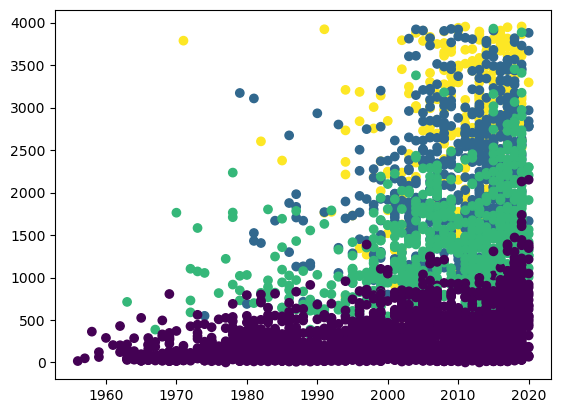

In [984]:
plt.scatter(dfCode['startYr'], dfCode['wantWatch'], c=dfCode['label'])
#shows how 4 levels of popularity/ higher votes.
#generally the more poeople want to watch newer animes

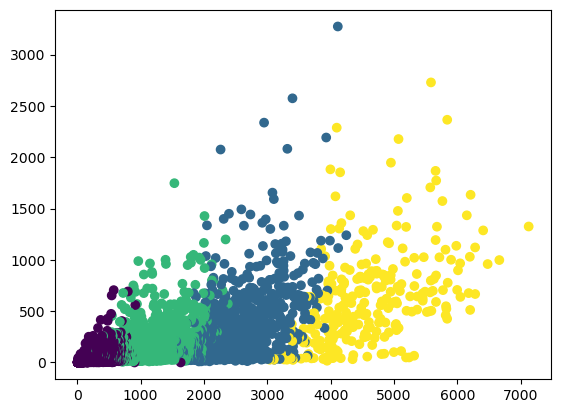

In [985]:
plt.scatter(dfCode['votes'], dfCode['watching'], c=dfCode['label'])
#shows how 4 levels of popularity/ higher votes.
# relatively flat with more of a positve realtionship 

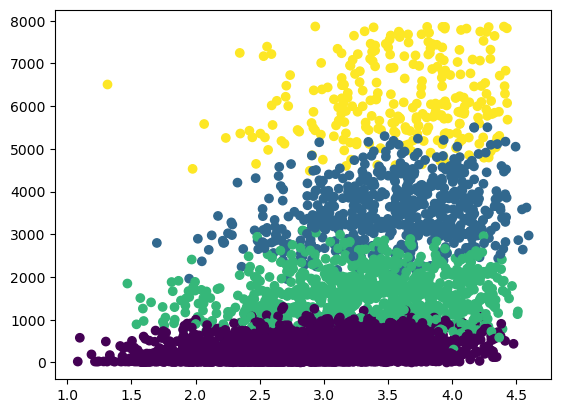

In [986]:
plt.scatter(dfCode['rating'], dfCode['watched'], c=dfCode['label'])
#not much of a relaitonship

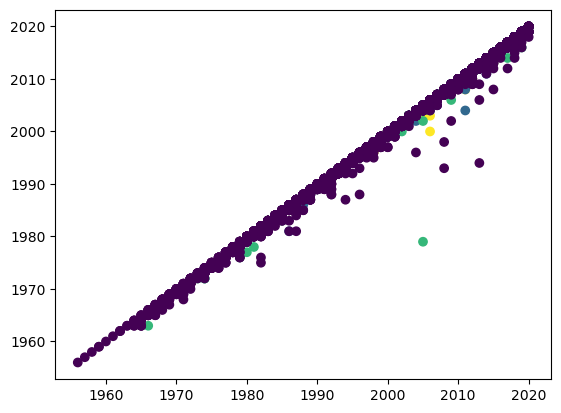

In [988]:
plt.scatter(dfCode['finishYr'], dfCode['startYr'], c=dfCode['label'])
#animes generally finish and start arounf the same time

### Hierarchical Clustering

In [989]:
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


dist = pdist(dfCode, 'euclidean')
linkage_matrix = linkage(dist,method ='complete')

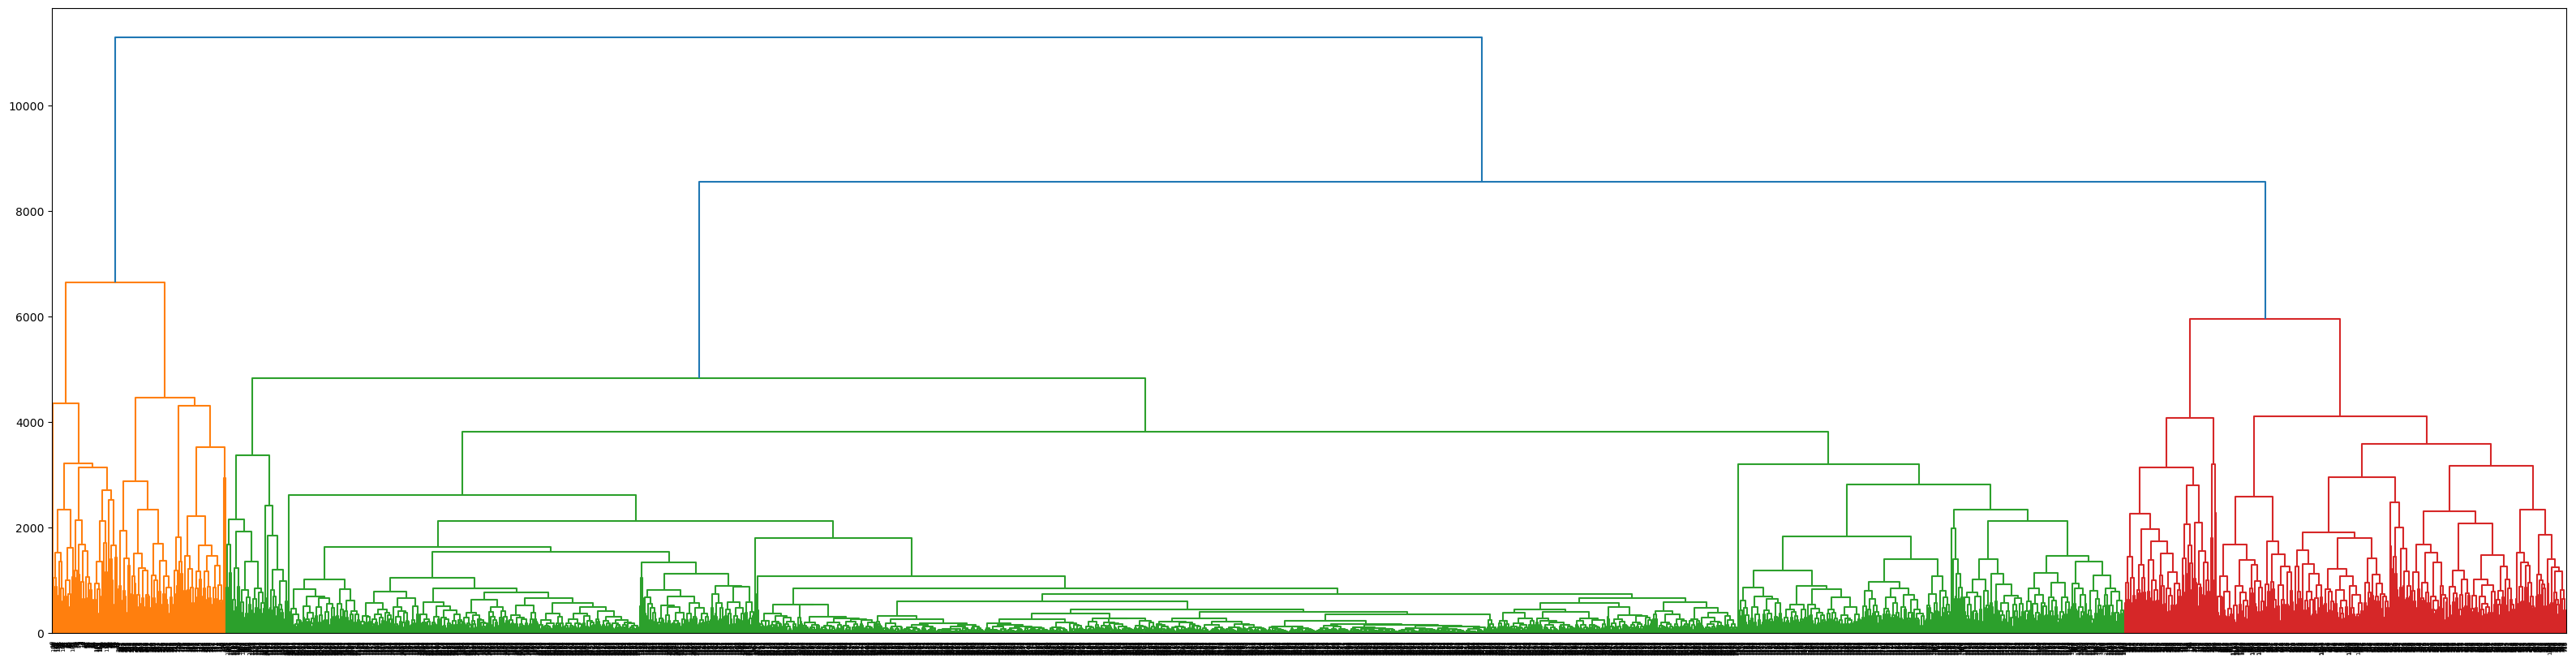

In [990]:
plt.figure(figsize =(40,10))
dendrogram(linkage_matrix)
plt.show()

In [1180]:
#we can see 4 distinct clusters

In [1181]:
labels = cut_tree(linkage_matrix, n_clusters =4)
dfCode['label'] = labels
dfCode

eps  startYr  finishYr  watched  \
title                                                                   
Pokemon: Pikachu's Rescue Adventure   1.0   1999.0    1999.0   7865.0   
One Outs                             25.0   2008.0    2009.0   7863.0   
Nagasarete Airantou                  26.0   2007.0    2007.0   7857.0   
Amagami SS+                          13.0   2012.0    2012.0   7856.0   
Birdy the Mighty: Decode             13.0   2008.0    2008.0   7856.0   
...                                   ...      ...       ...      ...   
I'm From Japan                       50.0   2019.0    2020.0      6.0   
B Rappers Street                     50.0   2019.0    2020.0      5.0   
Ore wa Teppei                        28.0   1977.0    1978.0      0.0   
Thundercats                          26.0   2011.0    2012.0      0.0   
You're Being Summoned, Azazel Z      13.0   2013.0    2013.0      0.0   

                                     watching  wantWatch  dropped  rating  \
title                                                                       
Pokemon: Pikachu's Rescue Adventure        17        773       22   2.934   
One Outs                                  667       3611      420   4.406   
Nagasarete Airantou                       705       2695      595   3.807   
Amagami SS+                               523       2532      277   3.926   
Birdy the Mighty: Decode                  548       3897      465   3.946   
...                                       ...        ...      ...     ...   
I'm From Japan                             17        190        5   3.486   
B Rappers Street                           14         47        5   2.293   
Ore wa Teppei                               0          0        0   2.818   
Thundercats                                 0          0        0   3.686   
You're Being Summoned, Azazel Z             0          0        0   3.959   

                                      votes  typeCode  studiosCode  label  
title                                                                      
Pokemon: Pikachu's Rescue Adventure  3943.0       0.0        286.0      0  
One Outs                             6279.0       1.0        238.0      0  
Nagasarete Airantou                  5771.0       1.0        541.0      0  
Amagami SS+                          5825.0       1.0         25.0      0  
Birdy the Mighty: Decode             5819.0       1.0          6.0      0  
...                                     ...       ...          ...    ...  
I'm From Japan                         11.0       1.0        287.0      3  
B Rappers Street                       10.0       1.0        314.0      3  
Ore wa Teppei                          43.0       1.0        272.0      3  
Thundercats                           905.0       1.0        391.0      3  
You're Being Summoned, Azazel Z      1633.0       1.0        331.0      3  

[3925 rows x 12 columns]

### Q.9 KNN MODEL 

In [992]:
#Split the dataset and train a KNN model to predict 'rating' based on other features.

# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(XTrain, YTrain)

#Evaluate the accuracy of your model.

# Use the model to predict testing data
y_pred = clf.predict(XTest)
accuracy = accuracy_score(y_pred, YTest)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.0186810076422304


testing accurcy has improved from logistic training

In [993]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors': range(1,500 )}

# Create the machine learning model
clf = GridSearchCV(clf, parameter_grid)
clf.fit(XTrain, YTrain)

# Identify the best parameter(s)
print(clf.best_params_)
print('The accuracy: ', clf.best_score_)

{'n_neighbors': 32}
The accuracy:  0.025511197663096397


In [ ]:
#tuning further improves